# Homework 3: Random Variables and Their Distributions
***

**Name**: Samuel Leon

**Section**: (001 or ~~002~~)
***

This assignment is due on Moodle by **5pm on Friday October 13th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
import math as math
%matplotlib inline

### [15 points] Problem 1 
***

A young boy and an old woman are playing [tic tac toe](https://en.wikipedia.org/wiki/Tic-tac-toe). Unfortunately, the boy is too young to know the strategy and the old woman can't see the board well enough to enact a strategy. Nevertheless, they are content to play games with each other. The boy plays first and randomly places an X in an open square. The woman plays next, and randomly places an O in one of the remaining open squares. They each play randomly until someone gets three in a row, and then start a new game. Estimate, via simulation, the probability that the boy wins.

**Note**: Part of the goal of this exercises is to give you more practice structuring a simulation. Definitely don't be afraid to write helper functions that get called from your main simulation routine. Things you might want to do modularly are (i) play a single game of tic-tac-toe, (ii) place an $X$ or an $O$ on an free square, or (iii) check if someone has one the game. This problem will not be autograded so feel free to get creative.  Just make sure to clearly display your results in code output and summarize things in Markdown. 

In [67]:
import random
def turn(player, board, remainingList):
	if(player == 'X'):
		choice = random.choice(remainingList)
		remainingList.remove(choice)
		board[choice] = 'X'
	if(player == 'Y'):
		choice = random.choice(remainingList)
		remainingList.remove(choice)
		board[choice] = 'Y'
	return remainingList, board

def selectWinner(board, winnerList):
    if(board[0] == board[1] and board[1] == board[2] and board[0] != 0):
        win = board[0]
        winnerList.append(win)
        return True, winnerList
    elif(board[3] == board[4] and board[4] == board[6] and board[3] != 0):
        win = board[3]
        winnerList.append(win)
        return True, winnerList
    elif(board[6] == board[7] and board[7] == board[8] and board[6] != 0):
        win = board[6]
        winnerList.append(win)
        return True, winnerList
    elif(board[6] == board[3] and board[3] == board[0] and board[6] != 0):
        win = board[6]
        winnerList.append(win)
        return True, winnerList
    elif(board[7] == board[4] and board[4] == board[1] and board[7] != 0):
        win = board[7]
        winnerList.append(win)
        return True, winnerList
    elif(board[8] == board[5] and board[5] == board[2] and board[8] != 0):
        win = board[8]
        winnerList.append(win)
        return True, winnerList
    elif(board[6] == board[7] and board[7] == board[8] and board[6] != 0):
        win = board[6]
        winnerList.append(win)
        return True, winnerList
    elif(board[6] == board[4] and board[4] == board[2] and board[6] != 0):
        win = board[6]
        winnerList.append(win)
        return True, winnerList
    elif(board[0] == board[4] and board[4] == board[8] and board[0] != 0):
        win = board[0]
        winnerList.append(win)
        return True, winnerList
    return False, winnerList

def game(trials):
	board = [0,0,0,0,0,0,0,0,0]
	selection = [0,1,2,3,4,5,6,7,8]
	winnerList = []

	for i in range(trials):
		board = [0]*9
		selection = [0,1,2,3,4,5,6,7,8]
		while(len(selection) != 0):
			selection, board = turn('X', board, selection)
			if(len(selection) == 0):
				break
			selection, board = turn('Y', board, selection)
			playerWins, winnerList = selectWinner(board, winnerList)
			if(playerWins == True):
				break
	count = 0
	for i in winnerList:
		count += 1
	return count/trials



probability = game(10000)
print("The probability that the boy wins is {}%".format(round(probability*100)))

The probability that the boy wins is 62%


### [20 points] Problem 2 
***

Let $X$ be the lifespan (in years) of a BF Goodrich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{10}{cx^2} & 1 \leq x \leq 10 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid density function. 

To do this we take the integral...
We want the fraction to sum to one (to be valid)
$$\int_{1}^{10} \frac{10}{cx^2} dx$$
$$= \frac{10}{c}\int_{1}^{10} \frac{1}{x^2} dx$$
$$= \frac{10}{c}\int_{1}^{10} \frac{1}{x^2} dx$$
$$= -\frac{10}{c}\frac{1}{x} \Big|_1^{10}$$
$$= \frac{10}{c}(\frac{-1}{10})-\frac{10}{c}(\frac{-1}{1})$$
$$= \frac{-1}{c} + \frac{10}{c} = 1$$
$$= \frac{9}{c} = 1$$
$$= \frac{c}{9} = 1$$
$$ c = 9$$

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

$$\int_{1}^{y} \frac{10}{9x^2} dx$$
$$= -\frac{10}{9}\frac{1}{x} \Big|_1^{y}$$
$$= \frac{10}{9}(\frac{-1}{y})-\frac{10}{9}(\frac{-1}{1})$$
$$= \frac{-1}{9} + \frac{y}{9}$$
$$= \frac{10}{9}(1-\frac{1}{y})$$

Therefore, our cumulative distribution function is:

$$F(y)=\cases{
    0, y < 0\\
    \frac{10}{9}(1-\frac{1}{y}), y \geq 1 < 10 \\
    1,  y \geq 10 \\
}$$

Where the probability of the tire failing is equal to the fractional result of the function, I.E. 0 probability means the TIre is assured not to fail, where as 1 is the probability that the tire *will* fail. 

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 8 years without failing. 

If we plug 8 into our $F(y)$ function:

$F(8) = \frac{1}{9}(8-1) = \frac{7}{9} = .\overline{77}$

The probability that a single tire goes longer than 8 years is 1 - p, which in this case is: $$\frac{10}{9}(1-\frac{1}{8})$$

Therefore, the probability that it does fail after 8 years is:
$$97.22\%$$
So, the probability that our tires **do not fail** after 8 years is:
$$~3\% \quad or \quad \frac{1}{36}$$

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $90\%$ of all tires will need to be replaced. In other words, determine the 90th percentile of the distribution of $X$. 

Here, we need only set our equation equal to 90% and see what we need y to be.

$$F(y) = \frac{10}{9}(1-\frac{1}{y}) = 0.90$$

$$F(y) = (.9)(\frac{9}{10})-1 = - \frac{1}{y}$$

$$F(y) = -0.19 = -\frac{1}{y}$$
$$F(y) = \frac{1}{-0.19} = -y$$
$$F(y) = \frac{1}{0.19} = y$$
$$ y = 5.263$$

Solving for y, we get:

$$y = 5.263$$

Therefore, it takes at least 5.26 years for the probability that our tires fail to be 90% or above.

**Part E**: What is the probability that all four BF Goodrich Rugged Trail T/A tires on a vehicle last longer than 8 years without failing? 

These are independent events (well, we are going to predent the tires have no precedence on one another, anyway- as we could have bought them all on separate dates. Despite this, we are going to say that we bought them all at the same time for brevity's sake). 

As a result, we need only multiply together the results of $F(8)$ for each tire.

Therefore:

$$= \frac{1}{36}*\frac{1}{36}*\frac{1}{36}*\frac{1}{36}$$ 

Or, 

$$(\frac{1}{36})^4 $$

### [20 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

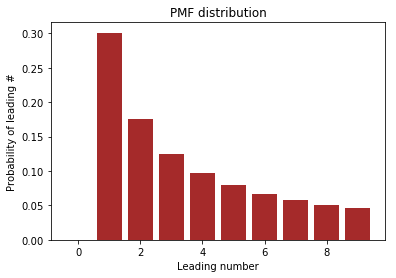

In [68]:
#############################
# Probability mass function #
#############################

def pmf_natural(x):
    if (x != 0):
        x = np.log10((x+1)/x)
        return x
    else:
        return 0
    
##########################################
# Our universal distribution function... #
##########################################

def u_dist(n):
    if (n != 0):
        x = 1/n
        return x
    else:
        return 0
    
#############################################################
# This is the cumulative distribution function for later... #
#############################################################
def cdf(x):
    count = 0
    if(x != 0):
        for i in range(x):
            count += pmf_natural(i)
    else:
        return 0
    return cdf
#######################################################################
# Find the sum of probabilities for our pmf function to test validity #
#######################################################################
list1 = []
sum_of_list = 0
for i in range(10):
    list1.append(pmf_natural(i))
    sum_of_list += list1[i]
    
##############################################
# Let's graph it to observe the distribution #
##############################################

plt.bar(range(len(list1)), list1, color = "brown")
plt.title("PMF distribution")
plt.xlabel("Leading number")
plt.ylabel("Probability of leading #")

In [69]:
print("The sum of probabilities of our PMF reach 1, as observed by the output of sum_of_list: {} so the 'Sum to 1' property is fulfilled.".format(sum_of_list))

The sum of probabilities of our PMF reach 1, as observed by the output of sum_of_list: 1.0 so the 'Sum to 1' property is fulfilled.


This is a valid PMF as it fulfills the two requirements of a defined PMF:

* Non-negativity: The values of this function are non-negative.
* Sums to 1: All of the returns of this function are fractional so, our limit of $f(x)$ is:
$$\lim_{x \to 9} f(x) \rightarrow 1 $$

Since both of these requirements are fulfilled, this is a valid PMF.

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

In [70]:
pmfList = []
uList = []
cdfList = []
#####################################
# Building our lists for the graphs #
#####################################

for i in range(9):
    pmfList.append(pmf_natural(i+1))
    uList.append(u_dist(9))
    cdfList.append(cdf(i))


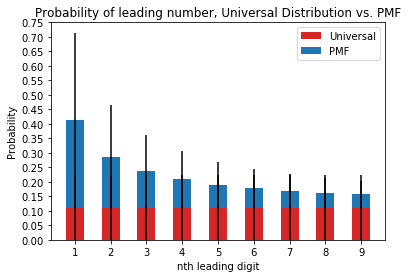

In [71]:
width = 0.5
#################
# Make my plots #
#################

p1 = plt.bar(range(0, len(uList)), uList, width, color='#d62728', yerr=uList)
p2 = plt.bar(range(0, len(pmfList)), pmfList, width, bottom=uList, yerr=pmfList)

ind = np.arange(9)
plt.ylabel('Probability')
plt.xlabel('nth leading digit')

##################
# Make it pretty #
##################
plt.title('Probability of leading number, Universal Distribution vs. PMF')
plt.xticks(ind, ('1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.yticks(np.arange(0, .8, .05))
plt.legend((p1[0], p2[0]), ('Universal', 'PMF'))

plt.show()

**Part C:** Write a function cdf_natural that implements the cumulative distribution function for $F(y)$ for $X$
and use it to compute the probability that the leading digit in a number is at most 4 and at most 5.

Note that the Cumulative Distribution Function is calculated by integrating the probability mass function.

In this case we have the indefinite integral: 

$$\int\log_{10}(\frac{x+1}{x}) = \frac{x\log(\frac{1}{x}+1) + log(x+1)}{log(10)} + C$$

In [72]:
#######################################################
# Calculate the probability of our leading numbers... #
#######################################################
def cdf(x):
    count = 0
    if(x != 0):
        #The integral is equivicably the summation/accumulation of the pmf, so we're going to do that-
        #Because we've already defined the pmf and it's easier
        for i in range(1, x):
            count += pmf_natural(i)
    else:
        return 0
    return count

p4 = cdf(5)
p5 = cdf(6)
print("The probability that the cdf is <= 4: {}%".format(p4*100))
print("The probability that the cdf is <= 5: {}%".format(p5*100))

The probability that the cdf is <= 4: 69.89700043360189%
The probability that the cdf is <= 5: 77.81512503836436%


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

The probability that our numbers are <= 4 is: 71.27222074820907%
The probability that our numbers are <= 5 is: 78.49694879278323%


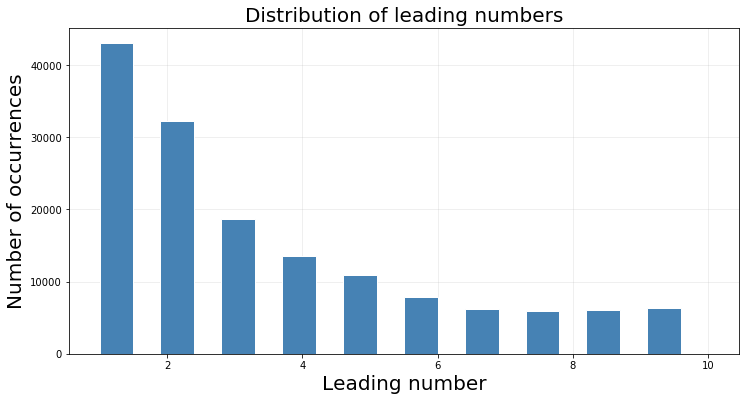

In [73]:
###################################################################################
# Let's build a graph of this tax document and make some predictions or something #
###################################################################################

local_path = 'tax_data.txt'
df = pd.read_csv(local_path, sep = '\t')
df = df[(df.T != 0).any()] #Remove any all zero entries
falseList = []
falseList = df["Tax Incomes"].values.T.tolist()
count = 0
count2 = 0

for i in range(len(falseList)):
    x = falseList[i]
    while(x > 10):
        x //= 10
    falseList[i] = x
for i in falseList:
    if i <= 4:
        count += 1
    if i <= 5:
        count2 += 1
print("The probability that our numbers are <= 4 is: {}%".format(count/150760*100))
print("The probability that our numbers are <= 5 is: {}%".format(count2/150760*100))
#This is very close to our desired value.

fig, ax = plt.subplots(figsize=(12,6))
plt.hist(falseList, color = "steelblue", edgecolor = "white", bins=10, width = .5)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_title("Distribution of leading numbers", fontsize = 20)
ax.set_xlabel("Leading number", fontsize = 20)
ax.set_ylabel("Number of occurrences", fontsize = 20)

plt.show()



The tax document follows the expected distribution of numbers as our previously defined function value. 

Expected: $\leq$ 4 is: $69.89\%$

Expected: $\leq$ 5 is: $77.81\%$

Experimentally found: $\leq 4$ is: $71.27\%$

Experimentally found: $\leq 5$ is: $78.49\%$

Our numbers are within 3% of eachother. Therefore, I am confident in saying that the Tax numbers are legitimate.

### [25 points] Problem 4 
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 20 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(20)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

These boats are a Poisson distribution.

The rules for our Poisson distribution are as follows:

1. The events must be indepedent 
2. There is no more than one occurrence per time interval
3. The probability of occurrence of said events must be constant

**Part B**:  What is the probability that 25 boats cross under the bridge on a particular day?

$$P(X) = \frac{\lambda^xe^{-\lambda}}{x!}$$

Plugging in our values...

$$P(25) = \frac{20^{(25)}e^{-20}}{(25!)}$$

**Part C**:  What is the probability that 15 boats or fewer cross under the bridge on a particular day?

We want the probability of $P(X\leq 15)$

We can get this by summing the all probabilities prior to this event.

$$P(X \leq 15) = P(X_0) + P(X_1) + P(X_2) + P(X_3) + ... P(X_{15})$$

$$= \sum_{i=0}^{15}\frac{20^{x_n}e^{-20}}{x_n!} = 0.156 = 15.60\%$$


**Part D**: What is the probability that between 1 and 2 hours pass between two boat crossings? 

This can be expressed with the following integral:
$$\int_a^b{\lambda e^{\lambda t}}dt$$
Again, plugging in our numbers and shifting a & b to be with reference to our frame of time- we get:
$$\int_{\frac{1}{24}}^\frac{2}{24}20e^{-20t}=\frac{1229}{5000}= 24.58\%$$

**Part F**: Write a function boat_count that takes as it's sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function.  

$$F(x) = \frac{1}{\beta}exp(\frac{-x}{\beta})$$

$$\beta = \frac{1}{\lambda}$$

In [74]:
#######################################################
# ♬ ♫ Building our Poisson distribution function ♫ ♬ #
#######################################################

def boat_count(lam):
    lam = lam/24
    num_boats = 0
    total_time = 0
    
    beta = 1/lam
    
    while(total_time< 24):
        exp = np.random.exponential(beta)
        if total_time + exp < 24:
            num_boats += 1
        total_time += exp

    return num_boats

In [75]:
boat_count(20)

22

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 15 boats or fewer cross under the bridge on a particular day. For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function.  

In [76]:
###############################################
# Now do the simulation for a variant of days #
###############################################

def boat_count_sim(lam, num_days=int(1e5)):
    day_count = 0
    for i in range(num_days+1):
        count = boat_count(20)
        if(count <= 15):
            day_count += 1
    return day_count/num_days

x= boat_count_sim(20)*100
x = round(x,2)
print("The probability that 15 or fewer boats arrive per day: {}%".format(x))

The probability that 15 or fewer boats arrive per day: 15.51%


**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 1 and 2 hours apart.  For $\lambda = 20$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  


In [77]:
################################################
# Now let's do it based on the number of boats #
################################################

def boat_time_sim(lam, num_boats=int(1e6)): 
    count = 0
    lam = lam/24 #put in terms of hours
    beta = 1/lam
    for i in range(num_boats):
        exp = np.random.exponential(beta)
        if(exp <= 2 and exp >= 1):
            count +=1
    return count/num_boats

x = boat_time_sim(20)*100
x = round(x, 2)
print("Probability that boats arrive 1 to 2 hours apart from one another: {}%".format(x))

Probability that boats arrive 1 to 2 hours apart from one another: 24.57%


### [20 points] Problem 5 
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


So, we need to find all the ways that we can win in 8 rounds, and remove all the ways we can win in 7 rounds.

$$({8\choose 6} - {7 \choose 6})(0.55)^6(0.45)^2$$
It is worth noting that $7 \choose 6$ includes all ways we could win in 7 games and in 6 games.

In [78]:
print("Probability that they win in exactly 8 games: {}%".format(round((binom(8,6) - binom(7,6))*((0.55**6)*(0.45**2))*100),2))

Probability that they win in exactly 8 games: 12.0%


**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

In [79]:
###################################################
# Put our combinatorics function in general terms #
###################################################
x = 0
for i in range(6, 12):
    #start at 6 because we can't win before that...obviously
    x += (binom(i,6) - (binom((i-1), 6)))*(0.55**6)*(0.45**(i-6))
x *= 100 #put it in terms of %'s
x = round(x,2) #round off dem ugly decimals
print("The probability that they win in an 11 game series: {}%".format(x))


The probability that they win in an 11 game series: 63.31%


**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

The expectation of the 11-series game will be as follows: 

$\$9,400$(probability that we win) + $\$0($Probability that we lose)

Since $0 * anything$ is 0, we can disclude this from our calculations.

Therfore, the expectation is simply:

$\$9,400$(probability that we win)

OR 

$\$9,400 * 92.18\%$

In [80]:
########################################
# Calculate the expectation of our PMF #
########################################
x = 0
for i in range(6, 12):
    #start at 6 because we can't win before that...obviously
    x += (binom(i,6) - (binom((i-1), 6)))*(0.7**6)*(0.3**(i-6))
x *= 100 #put it in terms of %'s
x = round(x,2) #round off dem ugly decimals
print("The probability that they win in an 11 game series with the mentor: {}%".format(x))

print("Expected winnings of an 11-game seires: ${}".format(.9218*(9400)))

The probability that they win in an 11 game series with the mentor: 92.18%
Expected winnings of an 11-game seires: $8664.92


**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


There are two factors we need to take into consideration when approaching this problem:
* The more games you play, the more likely you are to win (assuming .7 probability)
* The cumulative cost of "insurance" (Bob) goes up the more games you have to play

With that in mind, in order to maximize our winnings, we want to find a "sweet spot" wherein our likelyhood of winning is almost assured, at as cheap of a cost as possible.

It is likely that this will be within 10 games; because we are calculating the *expected* winnings, it is important that the probability of winning is high- to retain as much of the money on the table (after paying Bob).

So, we will want our probability to be $P(X): \geq 80\%$

We can get this within 10 games- and, after calculating the number below, I have found the answer to be 7 games at an expected winnings of: $\$8739.88$

**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [81]:
########################################################################################################################
# I did some stupid stuff here, to make things easier for me on the programming side.                                  #
# Let it be known that the games_to_win function returns the number of games one must win in order to win the series   #
# calculate_earnings determines the expectation after Bob's cut from the games                                         #
# build_graph takes all of the odd values (as even should *not* be included) and populates a list                      #
# optimal_series finds the maximum earnings available in our list                                                      #
########################################################################################################################

def games_to_win(x):
    x //= 2
    x+=1
    return x

def calculate_earnings(p, r):
    x = 0
    k = games_to_win(r)
    for i in range(1, r+1):
        #start at 6 because we can't win before that...obviously
        x += (binom(i,k) - (binom((i-1), k)))*(p**k)*((1-p)**(i-k))
    #print("The probability that they win in a {} game(s) series with the mentor: {}%".format(i, x))
    earnings = (10000-(k*100))*x
    earnings = round(earnings, 2)
    return earnings


def build_graph(p):
    list1 = []
    count = 0
    for i in range(1, 100, 2):
        list1.append(calculate_earnings(p, i))
        
    x = max(list1)
    return list1, x

def optimal_series(p):
    mList, maxVal = build_graph(p)
    for i in range(len(mList)):
        if(mList[i] == maxVal):
            return i
graphList, y = build_graph(.7)

print("The optimal expected payout occurs at: {} game(s), at a value of ${}.".format(optimal_series(.7), y))

The optimal expected payout occurs at: 7 game(s), at a value of $8739.88.


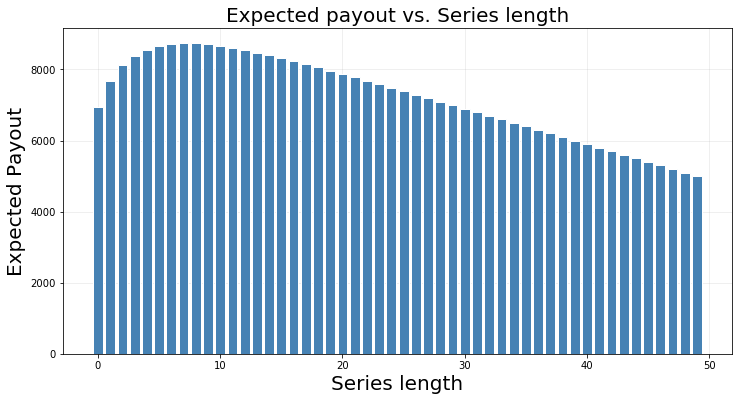

In [82]:
##################
# Make it pretty #
##################

fig, ax = plt.subplots(figsize=(12,6))
plt.bar(range(len(graphList)), graphList, color = "steelblue", edgecolor = "white")

ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_title("Expected payout vs. Series length", fontsize = 20)
ax.set_xlabel("Series length", fontsize = 20)
ax.set_ylabel("Expected Payout", fontsize = 20)

plt.show()

### Challenge Problem - Which Geyser Gushes First? 
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You arrive at the beautiful Three Geysers National Park. You read a placard explaining that the three eponymous geysers — creatively named $A$, $B$ and $C$ — erupt at intervals of precisely two hours, four hours and six hours, respectively. However, you just got there, so you have no idea how the three eruptions are staggered. Assuming they each started erupting at some independently random point in history, what are the probabilities that A, B and C, respectively, will be the first to erupt after your arrival?
